In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import random
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from scipy.stats import maxwell
from scipy.stats import norm
from tqdm import tqdm

In [11]:
#####  Function to compute time for wall collision ######
def wall_time(coord, velcomp, rad):  
    if velcomp > 0.0:
        del_t = (1.0 - rad - coord) / velcomp
    elif velcomp < 0.0:
        del_t = (coord - rad) / abs(velcomp)
    else:
        del_t = float('inf')
    return (del_t)


# Function to calculate time it takes for a pair of particles to collide. 
# pos1 and pos2 are positions of particles 1 and 2, vel1 and vel2 are their 
# velocities. rad is the radius of the particles. 
def pair_time(pos1, vel1, pos2, vel2, rad):  
    rel_pos = pos2 - pos1
    rel_vel = vel2 - vel1
    rel_dist_squar = np.dot(rel_pos,rel_pos)
    rel_speed_squar = np.dot(rel_vel,rel_vel)
    scal_prod = np.dot(rel_pos,rel_vel)
    a = scal_prod ** 2 - rel_speed_squar * ( rel_dist_squar - 4.0 * rad **2)
    if a > 0.0 and scal_prod < 0.0: ## Conditions for collision.
        del_t = - (scal_prod + np.sqrt(a)) / rel_speed_squar ## Collision time.
    else:
        del_t = float('inf')
    return (del_t)


# Function to generate an image of the disk configuration in the box.
def create_picture(positions):
    plt.cla()
    plt.gca().set_aspect('equal')
    plt.axis([0, L, 0, L])
    plt.setp(plt.gca(), xticks=[0, L], yticks=[0, L])
    for x,y in positions:
        atom = plt.Circle((x, y), Ratom, fc='r')
        plt.gca().add_patch(atom)
      

0.08920620580763855
[[0.10704745 0.10704745]
 [0.3033011  0.10704745]
 [0.10704745 0.3033011 ]
 [0.3033011  0.3033011 ]]
[[ 0.99613312  0.95654675]
 [-0.3003306  -0.03317157]
 [ 0.28685757  0.7757236 ]
 [-0.98804491 -0.29357155]]


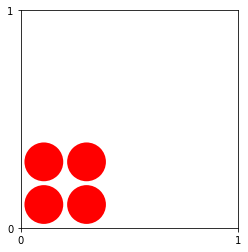

In [12]:
L = 1. ## Box edge length
N_s=2
Natoms = int((N_s)**2) # Number of disks
density = 0.1 # Fraction of the area of the box covered by the disks
Ratom = np.sqrt(density/(Natoms*np.pi))   ## Radius of disk.
print(Ratom)


## List indexing all pairs of atoms.
pairs = [[i,j] for i in range(Natoms) for j in range(i+1, Natoms)] 

## Positions and velocities of disks.
positions = np.zeros((Natoms,2))
velocities = np.zeros((Natoms,2))

for i in range (0,Natoms):
        positions[i][0]=Ratom*(2.2*(i%N_s)+1.2)
        positions[i][1]=Ratom*(2.2*(i//N_s)+1.2)
        velocities[i][0]=((-1)**i)*random.random()
        velocities[i][1]=((-1)**(i%2))*random.random()
print(positions)
print(velocities)
n_events = 60000 # Number of collision events.
create_picture(positions)
#################################################################################

In [13]:
 ############### Event Loop ##############################################
t=0.0
M=0
P_list=[]
p_list=[]
for event in tqdm(range(n_events)):
    # Wall collision times for all disks and their velocity components.
    wall_times = [wall_time(positions[i][j], velocities[i][j], Ratom) for i in range(Natoms) for j in range(2)] 
    # Pair collision times
    pair_times = [pair_time(positions[i], velocities[i], positions[j], velocities[j], Ratom) for i,j in pairs] 
    # The next collision event is the minimum of wall and pair collision times.
    next_event = min(wall_times + pair_times) 
    #print(next_event)
    step= int(((t+next_event)//1)-M)
    if (step>=1):
        alpha=(t+next_event)%1
        for i in range (step):
            for h in range (0,Natoms):
                positions[h] += velocities[h]*(next_event-alpha)
                if(event>2000):
                    P_list.append(np.sqrt(np.dot(positions[h],positions[h])))
                    p_list.append(positions[h][0])
    else:
        alpha=next_event%1
    t += next_event 
    M += step
    for i in range(Natoms):
        positions[i] += velocities[i]*alpha # Evolve positions to collision event
    if min(wall_times) < min(pair_times): # Check if next event is a collision with a wall
        wall_index = wall_times.index(next_event)
        particle, component = divmod(wall_index, 2)
        velocities[particle][component] *= -1.0 ## Velocity component normal to wall changes sign
    else:
        pair_index = pair_times.index(next_event)
        particle_1, particle_2 = pairs[pair_index] # Indices of particles participating in collision.
        rel_pos = positions[particle_2] - positions[particle_1]
        rel_vel = velocities[particle_2] - velocities[particle_1]
        distance = np.sqrt(np.dot(rel_pos,rel_pos))
        unit_perp = rel_pos/distance
        scal_prod = np.dot(rel_vel,unit_perp)
        velocities[particle_1] += scal_prod*unit_perp # Change in velocities of atoms colliding with each other
        velocities[particle_2] -= scal_prod*unit_perp
    #print(t)
print(positions)
print(velocities)
#print(P_list)
##################################################################################

100%|██████████| 60000/60000 [00:12<00:00, 4778.88it/s]

[[0.36513758 0.91079379]
 [0.55095708 0.60059617]
 [0.86267326 0.75870418]
 [0.57559083 0.8041361 ]]
[[ 0.27924664 -0.79832901]
 [-0.36126916 -0.79433444]
 [ 0.62281325 -0.81294978]
 [ 0.97254147 -0.52306974]]


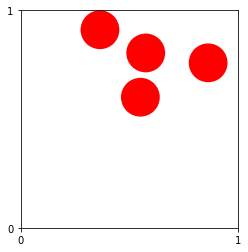

In [14]:
create_picture(positions)

In [15]:
#plt.hist(V_array, bins=20, density=True)
#sns.distplot(P_list,bins=20, hist_kws={'edgecolor':'black'},fit=norm,axlabel="position intervals",kde=False)
#plt.title("Maxwell dsiturbution curve(density) of positions ")
#plt.show()

In [16]:
##https://indianaiproduction.com/seaborn-histogram-using-seaborn-distplot/  -- link for histogram commands

In [17]:
print(len(P_list))

22720


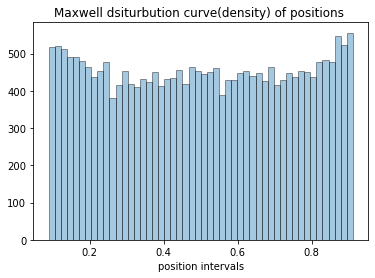

In [18]:
sns.distplot(p_list,bins=50, hist_kws={'edgecolor':'black'},axlabel="position intervals",kde=False)
plt.title("Maxwell dsiturbution curve(density) of positions ")
plt.show()